* `Import Libraries`

In [54]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # to compose some pipelines into one pipeline
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.feature_selection import f_classif,chi2

* ` Read the Dataset`

In [3]:
FILE_PATH=os.path.join(os.getcwd(),"..","dataset","Churn_Modelling.csv")
df= pd.read_csv(FILE_PATH)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Adjustcolumn names
df.columns.str.strip().str.replace(' ','_')

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# drop some columns
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
# stats
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* `EDA`

In [9]:
# check NANS
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df['Exited'].value_counts() #imbalanced data

Exited
0    7963
1    2037
Name: count, dtype: int64

In [13]:
df['Exited'].value_counts(normalize=True) 

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [14]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
df['Tenure'].unique()


array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

* `Data visualization and handling outliers`

* `Univariate Visualization`

<function matplotlib.pyplot.show(close=None, block=None)>

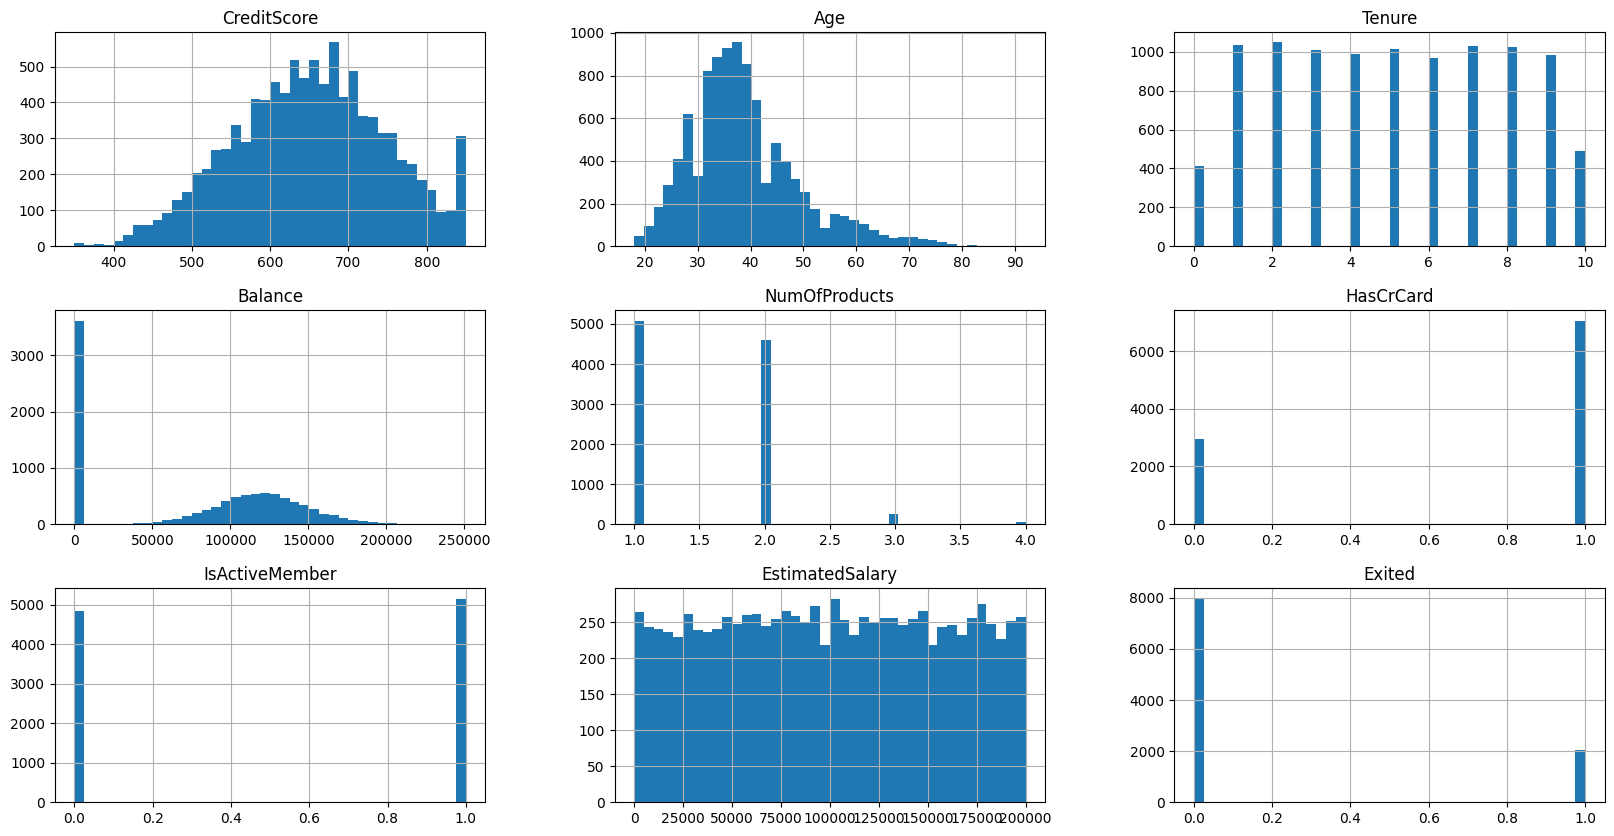

In [16]:
df.hist(bins=40,figsize=(20,10))
plt.show # only for numerical

In [17]:
# log transformation --> not good if it is not all +ve
# y_train_new=log(y_train)

# exp(y_train_new)

<Axes: ylabel='Age'>

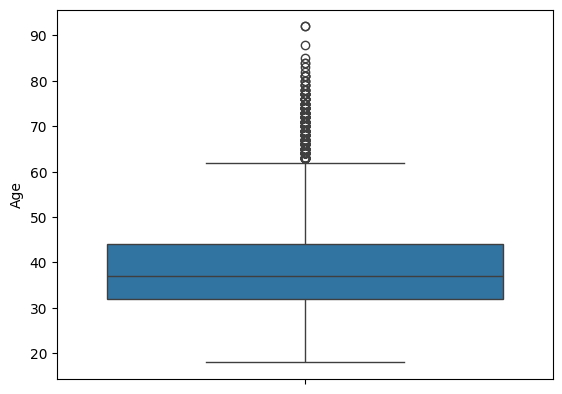

In [18]:
sns.boxplot(df['Age'])

In [19]:
df[df['Age']>80].shape

(12, 11)

In [20]:
# drop indeceises for age >80
df.drop(index=df[df['Age']>80].index.tolist(),axis=0,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

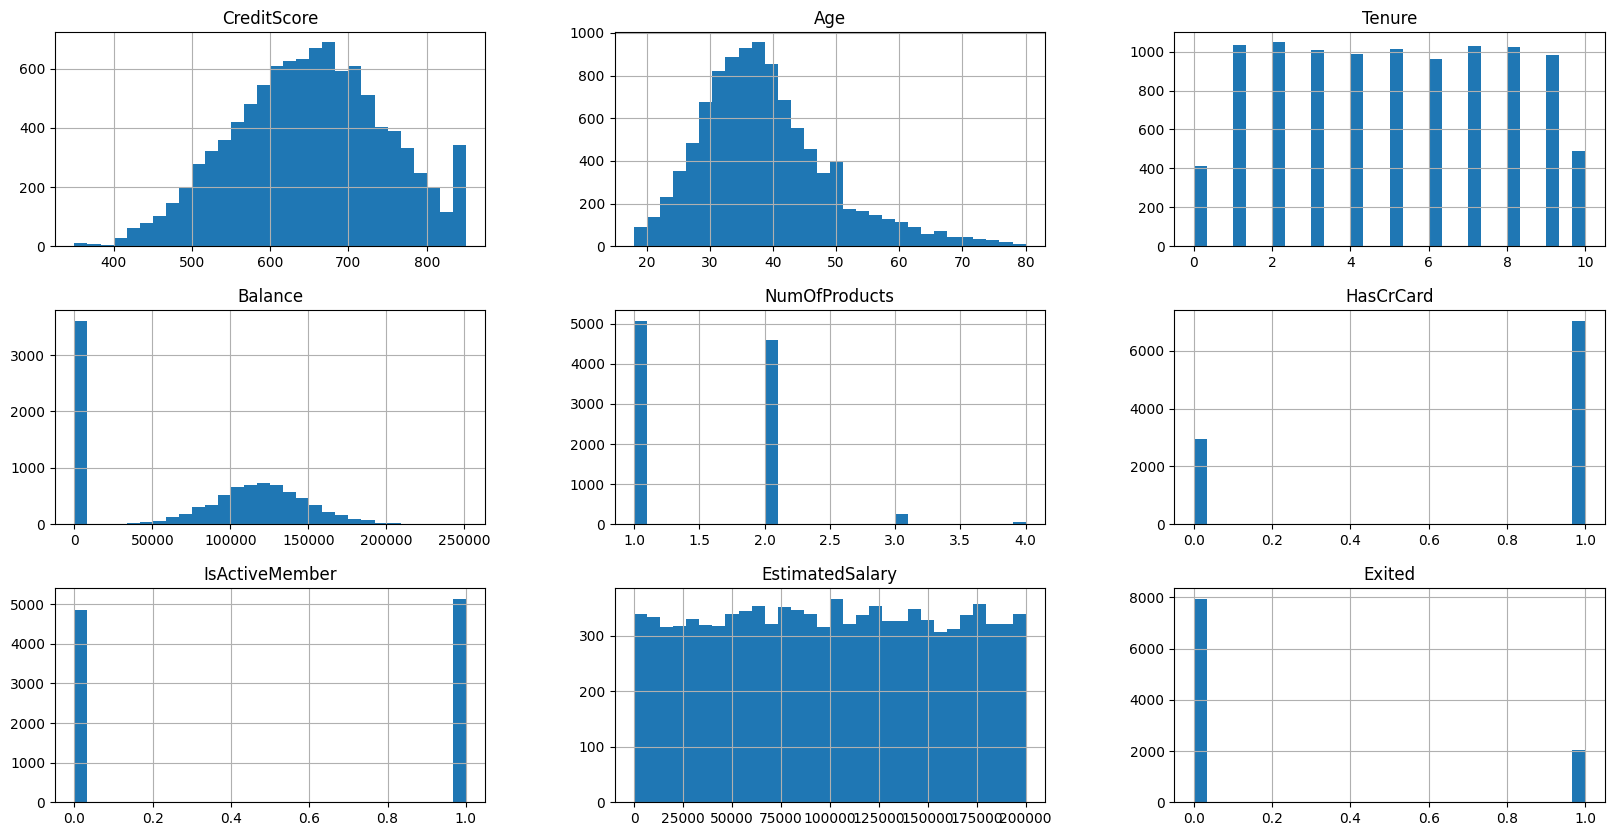

In [21]:
#After 
df.hist(bins=30,figsize=(20,10))
plt.show # only for numerical

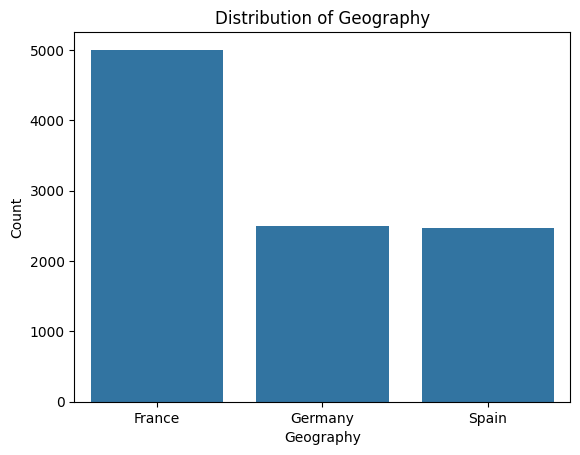

In [23]:
sns.countplot(data=df,x='Geography', order=df['Geography'].value_counts().index.to_list()) ## title ,xlabel,ylabel
plt.title("Distribution of Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

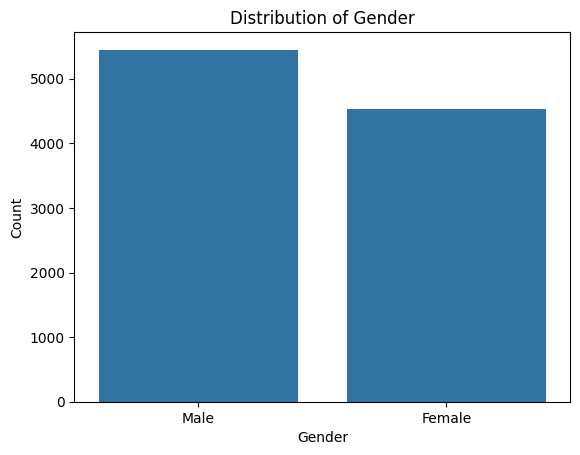

In [24]:
sns.countplot(data=df,x='Gender', order=df['Gender'].value_counts().index.to_list()) ## title ,xlabel,ylabel
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show

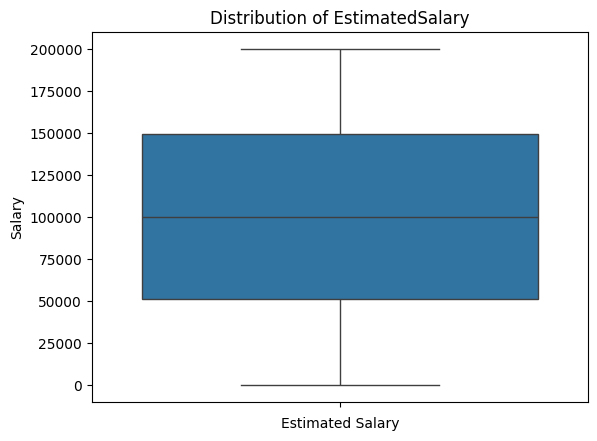

In [28]:
sns.boxplot(data=df,y='EstimatedSalary')
plt.title("Distribution of EstimatedSalary")
plt.xlabel("Estimated Salary")  
plt.ylabel("Salary") 
plt.show() #no outliers

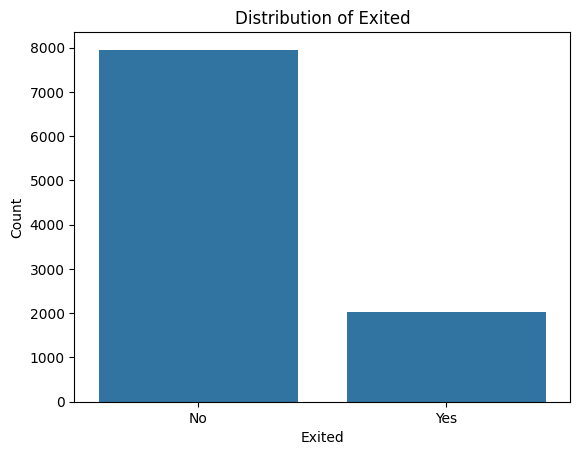

In [31]:
sns.countplot(data=df,x='Exited')
plt.xticks(labels=['No','Yes'],ticks=[0,1])
plt.title("Distribution of Exited")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show() 

* `BiVariate Vizualization`

In [32]:
# for each gender , get the mean of the EstimatedSalary
df.groupby("Gender")["EstimatedSalary"].mean()

Gender
Female    100575.998277
Male       99671.901194
Name: EstimatedSalary, dtype: float64

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

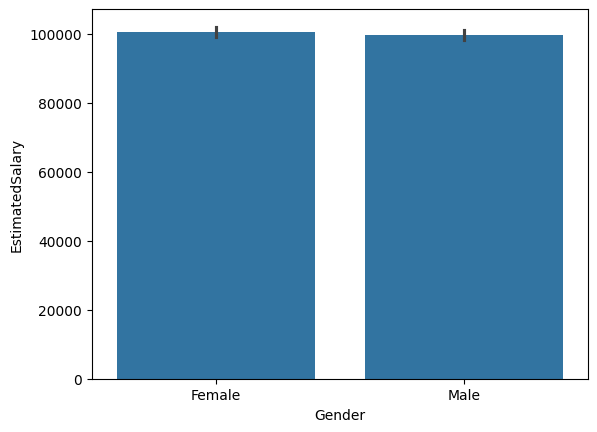

In [33]:
sns.barplot(data=df, x="Gender", y="EstimatedSalary",estimator="mean")

<Axes: xlabel='Tenure', ylabel='count'>

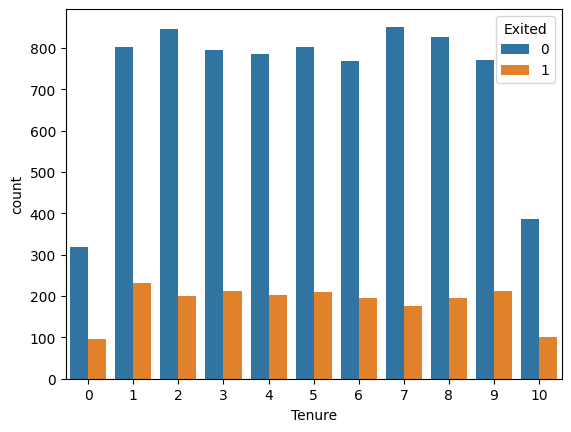

In [35]:
#Relation between Tenure & Exited
sns.countplot(data=df, x="Tenure", hue='Exited')


* `Split to train and test`

In [37]:
# to X & y
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=45, stratify=y)

# Check shapes
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (7990, 10)
y_train.shape 	 (7990,)
******************************
X_test.shape 	 (1998, 10)
y_test.shape 	 (1998,)


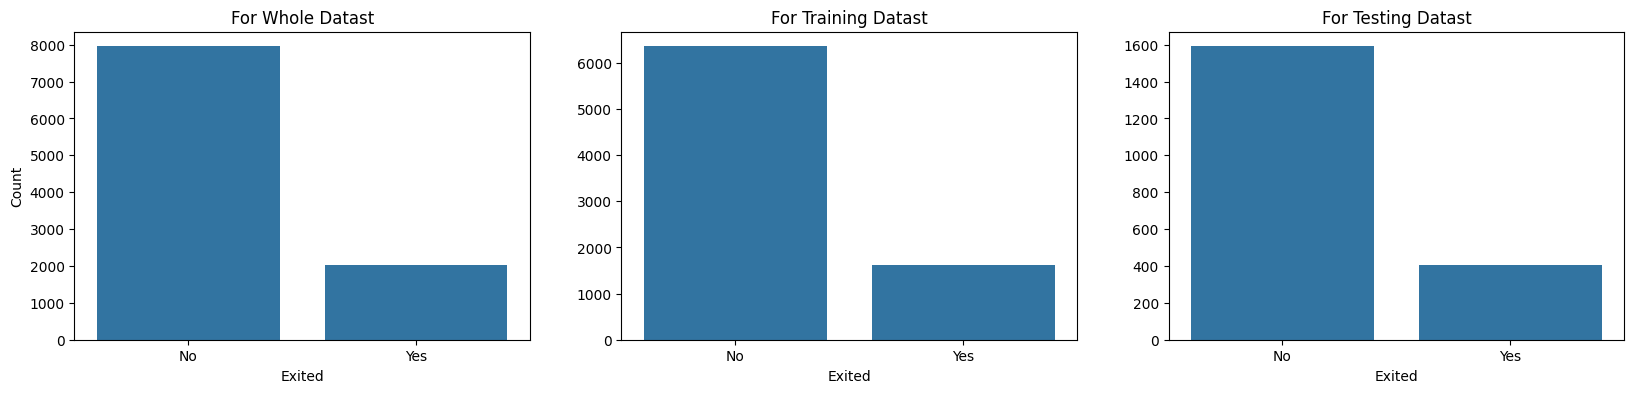

In [38]:
# plottting to check
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

# Whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('For Whole Datast')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# train
plt.sca(ax[1])
sns.countplot(x=y_train)
plt.title('For Training Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# test
plt.sca(ax[2])
sns.countplot(x=y_test)
plt.title('For Testing Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

* `Faeture Selection and Preprocessing`

filter methods

In [39]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2591,634,Germany,Male,38,2,148430.55,1,1,1,56055.72
1980,554,France,Female,30,9,0.00,2,1,1,40320.30
9866,667,France,Male,24,4,0.00,2,0,0,180329.83
7871,676,France,Female,36,3,91711.59,1,1,1,95393.43
5504,786,France,Male,32,2,120452.40,2,0,0,79602.86
...,...,...,...,...,...,...,...,...,...,...
7889,600,Germany,Male,57,9,138456.03,2,1,1,103548.25
7159,525,France,Female,59,6,55328.40,1,1,0,83342.73
5990,573,France,Female,32,9,125321.84,2,1,1,130234.63
6764,570,France,Male,37,6,0.00,1,1,1,187758.50


In [40]:
# slice cols
num_cols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categ_cols = ['Geography', 'Gender']

In [41]:
X_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [44]:
# any other cols that aren't nums or categ
ready_cols=list(set(X_train.columns)-set(num_cols)-set(categ_cols))
ready_cols

['NumOfProducts', 'IsActiveMember', 'HasCrCard', 'Tenure']

Anova for hypoth. test

In [ ]:
# for num_cols and target
# Numerical cols (num_cols) with Target col --> ANOVA
_, p_value= f_classif(X=X_train[num_cols],y=y_train) # that returns f statistic and p value, i only care about p value
p_value -0.05 # p_value ~ 0.05 --> Reject H0 --> There is an association between features and target
# we can exclude estimatedSalary

array([-0.05      ,  0.041299  , -0.05      ,  0.56612788])

In [ ]:
# Categorical cols (categ_cols) with Target col --> chi2
_, p_val = chi2(X=OrdinalEncoder().fit_transform(X_train[categ_cols]), y=y_train)
p_val  # p_value ~ 0.05 --> all ahve p value < 0.05 --> Reject H0 --> There is an association between features and target

array([1.56448286e-03, 5.13986341e-10])

In [57]:
# ready col as cateog_cal
# Ready cols (ready_cols) with Target col --> chi2
_, p_val = chi2(X=X_train[ready_cols], y=y_train)
p_val-0.05   # p_value ~ 0.05 --> Reject H0 --> There is an association between features and target

array([ 0.01551335, -0.05      ,  0.6192847 ,  0.0136015 ])

In [58]:
ready_cols

['NumOfProducts', 'IsActiveMember', 'HasCrCard', 'Tenure']

Pipeline for preprocessing
